# U.S. Medical Insurance Costs

## Step 1: Import the dataset and packages

In [91]:
import csv
def csv_read (key):
    lst = []
    with open('insurance.csv') as insurance_csv:
        csv_reader = csv.DictReader(insurance_csv)
        for row in csv_reader:
            lst.append(row.get(key))
    return lst
        

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
from statistics import mode
import matplotlib.pyplot as plt


## Step 2: Divide dataset into lists

In [93]:
ages = csv_read('age')
sex = csv_read('sex')
bmi = csv_read('bmi')
region = csv_read('region')
smoker = csv_read('smoker')
charges = csv_read('charges')
children = csv_read('children')

int_ages = [int(item) for item in ages]
int_children = [int(item) for item in children]
int_bmi = [int(int(float(item))) for item in bmi]
int_charges = [int(int(float(item))) for item in charges]

def type_function (lst):
    for item in lst:
        type_str = type(item)
    return type_str
print(type_function(int_bmi))

<class 'int'>


## Step 3: Exploratory Analysis

#### Qualitative Variables

In [94]:
sample_size = len(ages)

# Sex Distribution
male_count = 0
female_count = 0
for item in sex:
    if item == 'male':
        male_count += 1
    elif item == 'female':
        female_count += 1
    
print('The ratio between males and females in this dataset is of ' + str(round(male_count / female_count,1)) + '. This sample is comprised of ' + str(male_count) + ' males and ' + str(female_count) + ' females, which form ' + str(round((male_count / sample_size)*100,1)) + '% and ' + str(round((female_count/sample_size)*100,1)) + "% of the population respectively")


The ratio between males and females in this dataset is of 1.0. This sample is comprised of 676 males and 662 females, which form 50.5% and 49.5% of the population respectively


In [95]:
# Smoking Distribution
smoker_count = 0
non_smoker_count = 0
for item in smoker:
    if item == 'yes':
        smoker_count += 1
    elif item == 'no':
        non_smoker_count += 1

print('The ratio between smokers and non_smokers in this dataset is of ' + str(round(smoker_count / non_smoker_count,1)) + '. This sample is comprised of ' + str(smoker_count) + ' smokers and ' + str(non_smoker_count) + ' non_smokers, which form ' + str(round((smoker_count / sample_size)*100,1)) + '% and ' + str(round((non_smoker_count/sample_size)*100,1)) + "% of the population respectively")

sex_dict={'male':[], 'female':[]}
for item in range(len(sex)):
    if sex[item] == 'male':
        sex_dict['male'].append(smoker[item])
    elif sex[item] == 'female':
        sex_dict['female'].append(smoker[item])
#print(sex_dict)

male_smoke = sex_dict['male'].count('yes')
female_smoke = sex_dict['female'].count('yes')
print('The number of male smokers in the dataset is ' + str(round(male_smoke,1)) + ' making up ' + str(round((male_smoke / male_count * 100),1)) + '% of the male population. While the number of female smokers in the dataset is ' + (str(round(female_smoke,1))) + ' making up ' + str(round((female_smoke/female_count)* 100,1)) + '% of the female population.')

The ratio between smokers and non_smokers in this dataset is of 0.3. This sample is comprised of 274 smokers and 1064 non_smokers, which form 20.5% and 79.5% of the population respectively
The number of male smokers in the dataset is 159 making up 23.5% of the male population. While the number of female smokers in the dataset is 115 making up 17.4% of the female population.


In [96]:
# Region Distribution

southwest_count = 0
southeast_count = 0
northwest_count = 0
northeast_count = 0
for item in region:
    if item == 'southwest':
        southwest_count += 1
    elif item == 'southeast':
        southeast_count += 1
    elif item == 'northwest':
        northwest_count +=1
    elif item == 'northeast':
        northeast_count += 1

print('Out of the total population, ' + str(southwest_count) + ' people are from the Southwest, representing ' + str(round((southwest_count/sample_size)*100,1)) + '%.')
print('Out of the total population, ' + str(southeast_count) + ' people are from the Southeast, representing ' + str(round((southeast_count/sample_size)*100,1)) + '%.')
print('Out of the total population, ' + str(northwest_count) + ' people are from the Northwest, representing ' + str(round((northwest_count/sample_size)*100,1)) + '%.')
print('Out of the total population, ' + str(northeast_count) + ' people are from the Northeast, representing ' + str(round((northeast_count/sample_size)*100,1)) + '%.')

Out of the total population, 325 people are from the Southwest, representing 24.3%.
Out of the total population, 364 people are from the Southeast, representing 27.2%.
Out of the total population, 325 people are from the Northwest, representing 24.3%.
Out of the total population, 324 people are from the Northeast, representing 24.2%.


### Quantitative Variables 


In [97]:
# Age Analysis

def average_age(list):
    sum = 0
    length = 0
    for item in list:
        sum += item
        length += 1
    return sum/length

print('Average age in the dataset: ' + str(round(average_age(int_ages),1)))
print('Maximum age in the dataset: ' + str(max(int_ages)))
print('Minimum age in the dataset: ' + str(min(int_ages)))

age_16_25_count = 0
age_26_35_count = 0
age_36_45_count = 0
age_46_55_count = 0
age_56_65_count = 0
for item in int_ages:
    if item >= 16 and item <= 25:
        age_16_25_count += 1
    elif item >= 26 and item <= 35:
        age_26_35_count += 1
    elif item >= 36 and item <= 45:
        age_36_45_count += 1
    elif item >= 46 and item <= 55:
        age_46_55_count += 1
    elif item >= 56 and item <= 65:
        age_56_65_count += 1

print ('There are ' + str(age_16_25_count) + ' people between the ages of 16 and 25 (' + str(round((age_16_25_count/sample_size)*100,1))+ '% of the population) ')
print('There are ' + str(age_26_35_count)+ ' people between the ages of 26 and 35 (' + str(round((age_26_35_count/sample_size)*100,1))+ '% of the population)')  
print( 'There are ' + str(age_36_45_count) + ' people between the ages of 36 and 45 (' + str(round((age_36_45_count/sample_size)*100,1))+ '% of the population)') 
print( 'There are ' + str(age_46_55_count) + ' people between the ages of 46 and 55 ('+ str(round((age_46_55_count/sample_size)*100,1))+ '% of the population)')
print( 'There are ' + str(age_56_65_count) + ' people between the ages of 56 and 65 ('+ str(round((age_56_65_count/sample_size)*100,1))+ '% of the population)')


Average age in the dataset: 39.2
Maximum age in the dataset: 64
Minimum age in the dataset: 18
There are 306 people between the ages of 16 and 25 (22.9% of the population) 
There are 268 people between the ages of 26 and 35 (20.0% of the population)
There are 264 people between the ages of 36 and 45 (19.7% of the population)
There are 284 people between the ages of 46 and 55 (21.2% of the population)
There are 216 people between the ages of 56 and 65 (16.1% of the population)


In [98]:
# BMI Analysis

underweight = 0
normal = 0
overweight = 0
obese = 0
for item in int_bmi:
    if item <18.5:
        underweight += 1
    elif item >= 18.5 and item <= 24.9:
        normal += 1
    elif item >= 25 and item <= 29.9:
        overweight += 1
    elif item >= 30:
        obese += 1

bmi_male = {
    'underweight' : 0,
    'normal' : 0,
    'overweight' : 0,
    'obese' : 0,
}
#print(bmi_male)
bmi_female = {
    'underweight' : 0,
    'normal' : 0,
    'overweight' : 0,
    'obese' : 0,
}

for item in range(sample_size):
    if sex[item] == 'female':
            if int_bmi[item] < 18.5:     
                bmi_female['underweight'] += 1
            elif int_bmi[item] >= 18.5 and int_bmi[item] <= 24.9:
                bmi_female['normal'] += 1
            elif int_bmi[item] >= 25 and int_bmi[item] <= 29.9:
                bmi_female['overweight'] += 1
            elif int_bmi[item] >= 30:
                bmi_female['obese'] += 1
    elif sex[item] == 'male':
            if int_bmi[item] <18.5:
                bmi_male['underweight'] += 1
            elif int_bmi[item] >= 18.5 and int_bmi[item] <= 24.9:
                bmi_male['normal'] += 1
            elif int_bmi[item] >= 25 and int_bmi[item] <= 29.9:
                bmi_male['overweight'] += 1
            elif int_bmi[item] >= 30:
                bmi_male['obese'] += 1

print('BMI < 18.5: ' + str(underweight) + ' people. ' + str(round((bmi_female['underweight']/underweight)*100,1)) + '% females, ' + str(round((bmi_male['underweight']/underweight)*100,1)) + '% males ')
print('BMI 18.5-24.9: ' + str(normal) + ' people. ' + str(round((bmi_female['normal']/normal)*100,1)) + '% females, ' + str(round((bmi_male['normal']/normal)*100,1)) + '% males ')
print('BMI 15-29.9: ' + str(overweight) + ' people. ' + str(round((bmi_female['overweight']/overweight)*100,1)) + '% females, ' + str(round((bmi_male['overweight']/overweight)*100,1)) + '% males ')
print('BMI > 30: ' + str(obese) + ' people. ' + str(round((bmi_female['obese']/obese)*100,1)) + '% females, ' + str(round((bmi_male['obese']/obese)*100,1)) + '% males, ')


BMI < 18.5: 24 people. 58.3% females, 41.7% males 
BMI 18.5-24.9: 221 people. 52.0% females, 48.0% males 
BMI 15-29.9: 386 people. 51.6% females, 48.4% males 
BMI > 30: 707 people. 47.2% females, 52.8% males, 


In [99]:
# Children Analysis

# Figuring out lower and upper bounds for distribution
upper_children_limit = max(int_children)
lower_children_limit = min(int_children)

print('max number of children in the dataset: '+ str(upper_children_limit))
print('min number of children in the dataset: ' + str(lower_children_limit))

max number of children in the dataset: 5
min number of children in the dataset: 0


In [100]:
# Initializing possible distribution variables 
no_children = 0
children_1 = 0
children_2 = 0
children_3 = 0
children_4 = 0
children_5 = 0

for item in int_children:
    if item == 0:
        no_children += 1
    elif item == 1:
        children_1 += 1
    elif item == 2:
        children_2 += 1
    elif item == 3:
        children_3 += 1
    elif item == 4:
        children_4 += 1
    elif item == 5:
        children_5 += 1
    
print('People with no children: ' + str(no_children) + '. Comprising ' + str(round((no_children/sample_size)* 100,1)) + '% of the population.')
print('People with one child: ' + str(children_1) + '. Comprising ' + str(round((children_1/sample_size)* 100,1)) + '% of the population.')
print('People with two children: ' + str(children_2) + '. Comprising ' + str(round((children_2/sample_size)* 100,1)) + '% of the population.')
print('People with three children: ' + str(children_3) + '. Comprising ' + str(round((children_3/sample_size)* 100,1)) + '% of the population.')
print('People with four children: ' + str(children_4) + '. Comprising ' + str(round((children_4/sample_size)* 100,1)) + '% of the population.')
print('People with five children: ' + str(children_5) + '. Comprising ' + str(round((children_5/sample_size)* 100,1)) + '% of the population.')

People with no children: 574. Comprising 42.9% of the population.
People with one child: 324. Comprising 24.2% of the population.
People with two children: 240. Comprising 17.9% of the population.
People with three children: 157. Comprising 11.7% of the population.
People with four children: 25. Comprising 1.9% of the population.
People with five children: 18. Comprising 1.3% of the population.


## Step 4: Hypothesis Testing
Which of the given variables affects the price of health insurance more harshly? 

Ha: There is a positive relationship between every single variable and the insurance charges\
H0: There is no relationship between every single variable and the insurance charges

In [101]:
#p_value = 0.05
print('max insurance charge in the dataset is ' + str(max(int_charges)))
print('min insurance charge in the dataset is ' + str(min(int_charges)))

print("Q1 quantile: ", np.quantile(int_charges, .25))
print("Q2 quantile: ", np.quantile(int_charges, .50))
print("Q3 quantile: ", np.quantile(int_charges, .75))
print("Top 10% of charges: ", np.quantile(int_charges, .90))

threshold_value = np.quantile(int_charges, .90)

zipped_data = zip(sex, int_ages ,region, smoker, int_bmi, int_children , int_charges)
listed_data = list(zipped_data)
#print(listed_data)

threshold_list = [item[0:] for item in listed_data if item[6] == threshold_value or item[6] > threshold_value]
#print(threshold_list)

max insurance charge in the dataset is 63770
min insurance charge in the dataset is 1121
Q1 quantile:  4740.0
Q2 quantile:  9381.5
Q3 quantile:  16639.25
Top 10% of charges:  34831.0


In [102]:
def count_qual(lst,element,index):
    counter = 0
    for item in lst:
        if item[index] == element:
            counter += 1
    return counter
# Sex
print('Number of males in the top 10% of insurance charges: '+ str(count_qual(threshold_list,'male', 0)))
print('Number of females in the top 10% of insurance charges: ' + str(count_qual(threshold_list,'female', 0)))

# Smoking
print('Smokers: ' + str(count_qual(threshold_list, 'yes', 3)))
print('Non-Smokers: ' + str(count_qual(threshold_list, 'no', 3)))

# Region
print('Southeast: ' + str(count_qual(threshold_list, 'southeast', 2)))
print('Southwest: ' + str(count_qual(threshold_list, 'southwest', 2)))
print('Northeast: ' + str(count_qual(threshold_list, 'northeast', 2)))
print('Northwest: ' + str(count_qual(threshold_list, 'northwest', 2)))


Number of males in the top 10% of insurance charges: 84
Number of females in the top 10% of insurance charges: 50
Smokers: 131
Non-Smokers: 3
Southeast: 55
Southwest: 32
Northeast: 27
Northwest: 20


In [103]:
top_ages = [item[1] for item in threshold_list]
#print(top_ages)
top_bmi = [item[4] for item in threshold_list]
#print(top_bmi)
top_children = [item[5] for item in threshold_list]
top_charges = [item[6] for item in threshold_list]
#print(top_charges)



print('Most ocurring age in top 10% of insurance charges: ' + str(mode(top_ages)))
print('Most ocurring bmi in top 10% of insurance charges: ' + str(mode(top_bmi)))
print('Most ocurring number of children in top 10% of insurance charges: ' + str(mode(top_children)))

Most ocurring age in top 10% of insurance charges: 37
Most ocurring bmi in top 10% of insurance charges: 36
Most ocurring number of children in top 10% of insurance charges: 0


In [104]:
pearsons_coefficient_age = np.corrcoef(top_charges, top_ages)
print("Correlation coefficient between age and insurance charges " + str(pearsons_coefficient_age))


pearsons_coefficient_bmi = np.corrcoef(top_charges, top_bmi)
print("Correlation coefficient between BMI and insurance charges " + str(pearsons_coefficient_bmi))

pearsons_coefficient_children = np.corrcoef(top_charges, top_children)
print("Correlation coefficient between number of children and insurance charges " + str(pearsons_coefficient_children))


Correlation coefficient between age and insurance charges [[1.         0.55769856]
 [0.55769856 1.        ]]
Correlation coefficient between BMI and insurance charges [[1.         0.31898081]
 [0.31898081 1.        ]]
Correlation coefficient between number of children and insurance charges [[ 1.         -0.00538623]
 [-0.00538623  1.        ]]


coefficient of determination: 0.10174875554058815
intercept: 24.0777632153103
slope: [0.00026108]


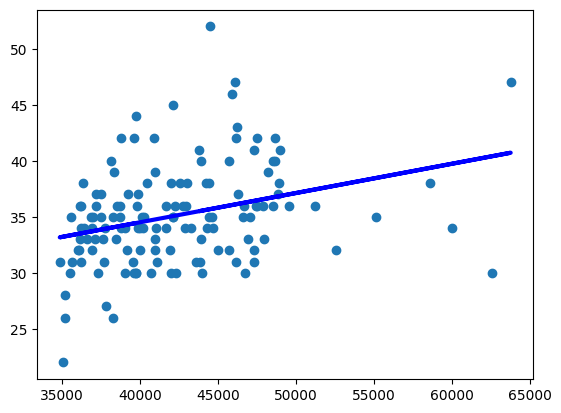

In [105]:
# Providing data for BMI
x = np.array(top_charges).reshape((-1,1))
#print(x)
""" y = np.array(top_charges).reshape((-1,1))
print(y) """

# Creating model and fitting it
model = LinearRegression().fit(x,top_bmi)

# Getting results
r_sq = model.score(x,top_bmi)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

# Predicting Response
y_pred = model.predict(x)
#print(f"predicted response:\n{y_pred}")

plt.scatter(top_charges, top_bmi)
plt.plot(x,y_pred, color="blue", linewidth=3)


coefficient of determination: 0.3110276785799738
intercept: -16.382606249889207
slope: [0.00137255]


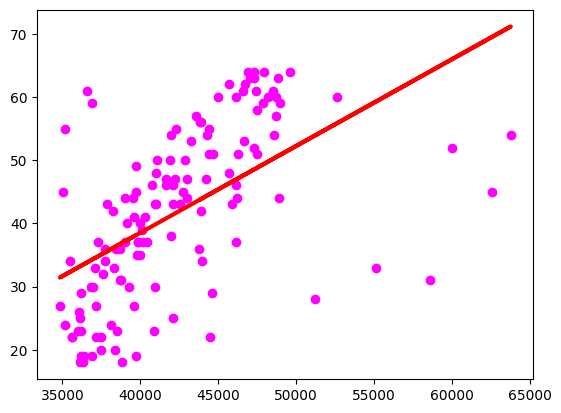

In [106]:
# Providing data for ages
x = np.array(top_charges).reshape((-1,1))
#print(x)
""" y = np.array(top_charges).reshape((-1,1))
print(y) """

# Creating model and fitting it
model = LinearRegression().fit(x,top_ages)

# Getting results
r_sq = model.score(x,top_ages)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

# Predicting Response
y_pred = model.predict(x)
#print(f"predicted response:\n{y_pred}")

plt.scatter(top_charges, top_ages, color = "magenta")
plt.plot(x,y_pred, color="red", linewidth=3)


coefficient of determination: 2.9011477144957887e-05
intercept: 1.2707272794126696
slope: [-1.10544233e-06]


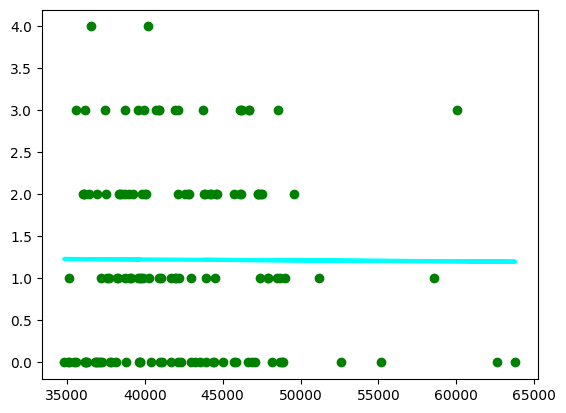

In [120]:
# Providing data for ages
x = np.array(top_charges).reshape((-1,1))
#print(x)
""" y = np.array(top_charges).reshape((-1,1))
print(y) """

# Creating model and fitting it
model = LinearRegression().fit(x,top_children)

# Getting results
r_sq = model.score(x,top_children)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

# Predicting Response
y_pred = model.predict(x)
#print(f"predicted response:\n{y_pred}")

plt.scatter(top_charges, top_children, color = "green")
plt.plot(x,y_pred, color="cyan", linewidth=3)
